https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb <br/>
https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.linear_model import LogisticRegression


# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Training and visualizing

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

url= "brain_stroke_in_numeric_without_useless_data.csv"
brain = pd.read_csv(url)
brain = brain.drop(brain.columns[0], axis=1)
brain_pca = pd.read_csv('brain_stroke_after_pca.csv')
brain_pca = brain_pca.drop(brain_pca.columns[0], axis=1) 
print(brain)

      gender   age  hypertension  heart_disease  ever_married  \
0          0  67.0             0              1             1   
1          0  80.0             0              1             1   
2          1  49.0             0              0             1   
3          1  79.0             1              0             1   
4          0  81.0             0              0             1   
...      ...   ...           ...            ...           ...   
4976       0  41.0             0              0             0   
4977       0  40.0             0              0             1   
4978       1  45.0             1              0             1   
4979       0  40.0             0              0             1   
4980       1  80.0             1              0             1   

      avg_glucose_level   bmi  smoking_status  stroke  
0                228.69  36.6               2       1  
1                105.92  32.5               1       1  
2                171.23  34.4               3      

In [3]:
# Test accuracy with avg_glucose_level and bmi

In [4]:
X = brain.iloc[:, [5,6]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


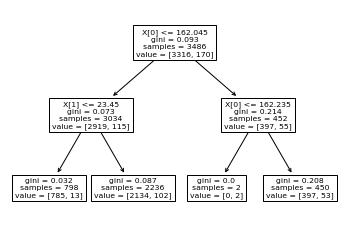

In [5]:
plot_tree(tree_clf);

In [6]:
# Test accuracy with age and avg_glucose_level

In [7]:
X = brain.iloc[:, [1,5]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


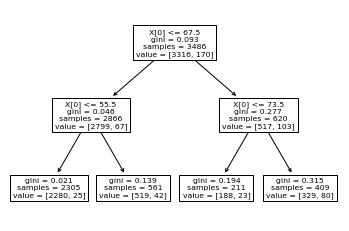

In [8]:
plot_tree(tree_clf);

In [9]:
# Test accuracy with age and bmi

In [10]:
X = brain.iloc[:, [1,6]].to_numpy()
y = brain.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


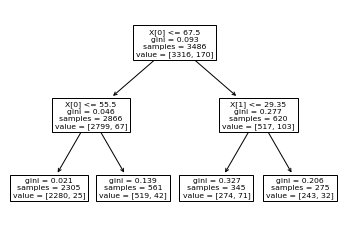

In [11]:
plot_tree(tree_clf);

In [12]:
# Test accuracy with pca 

In [13]:
X = brain_pca.iloc[:, [0,1]].to_numpy()
y = brain_pca.iloc[:, 2].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478260869565217


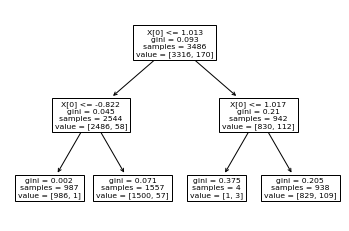

In [14]:
plot_tree(tree_clf);

In [15]:
# We are using the PCA because more simple to use, and this dataset summarize the best of all the features in the dataset 
# We are not printing the plot see in the tutorial because they are not relevant with our dataset

In [16]:
class EnsembleClassifier():

    def __init__(self,base_classifier,labels):
        self.classifier = [base_classifier]
        self.labels = labels
    def add_classifier(self,classifier):
        self.classifier.append(classifier)
    def remove_last_classifier(self):
        self.classifier.pop(-1)
    def predict_proba(self,X):
        return np.array([clf.predict_proba(X) for clf in self.classifier]).sum(axis=0)/len(self.classifier)
    def predict(self,X):
        return labels[np.argmax(self.predict_proba(X),axis=1)]
    def error(self,X,y):
        return 1 - accuracy_score(y,ensembleClassifier.predict(X))

class Artificial_data():

    def __init__(self,X,y,dtypes):
        self.dtypes = {}
        self._generator = {}
        self.labels = y.unique()
        for c, dtype in zip(X.columns, dtypes):
            self.dtypes[c] = dtype
            if dtype == 'numeric':
                self._generator[c] = {'mean':X[c].mean(),'std':X[c].std()}
            else:
                unique_values = X[c].value_counts() / X.shape[0]
                self._generator[c] = {'values':unique_values.index,'prob':unique_values.values}

    def sample_generator(self,ensembleClasifier,nb_samples=1):
        syn_X = pd.DataFrame()
        for c in self.dtypes.keys():
            if self.dtypes[c] == 'numeric':
                syn_X[c] = np.random.normal(self._generator[c]['mean'],self._generator[c]['std'],nb_samples)
            else:
                syn_X[c] = np.random.choice(self._generator[c]['values'],p=self._generator[c]['prob'],
                                             size=nb_samples,replace=True)
        p_hat = ensembleClassifier.predict_proba(syn_X)
        p_hat[p_hat==0] = 1e-5
        inverse_p = 1/p_hat
        new_p = inverse_p / inverse_p.sum(axis=1)[:, np.newaxis]
        syn_y = [np.random.choice(self.labels,p=new_p[i]) for i in range(nb_samples)]
        return syn_X,syn_y  



In [23]:
X = brain_pca.iloc[:, [0,1]]
y = brain_pca.iloc[:, 2]

X_train_base, X_test, y_train_base, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtypes=['numeric' for _ in range(2)]
np.random.seed(1)
artifical_data = Artificial_data(X_train_base, y_train_base, dtypes)

c_size = 15
i_max = 300 
R_size = len(X_train_base)
i = 1
trails =1
labels = np.unique(y_train_base)
clf = DecisionTreeClassifier(random_state = 1, max_depth=2)
clf.fit(X_train_base, y_train_base)


ensembleClassifier = EnsembleClassifier(clf,labels)
error_bst = ensembleClassifier.error(X_train_base, y_train_base)

while (i < c_size and trails < i_max):
    X_syn, y_syn = artifical_data.sample_generator(ensembleClassifier, R_size)
    X_train = pd.concat([X_train_base, X_syn], axis = 0)
    y_train = np.append(y_train_base, y_syn, axis = 0)

    C_prime = DecisionTreeClassifier(random_state = 1, max_depth = 2)
    C_prime.fit(X_train, y_train)

    ensembleClassifier.add_classifier(C_prime)

    error_i = ensembleClassifier.error(X_train_base, y_train_base)

    if error_i <= error_bst:
        print('improvement')
        error_bst = error_i
        print(error_i)
        i += 1
    else:
        ensembleClassifier.remove_last_classifier()

    trails +=1

improvement
0.048192771084337394
improvement
0.048192771084337394
improvement
0.048192771084337394


In [34]:
from chefboost import Chefboost as chef
X = brain_pca.iloc[:, [0,1]]
y = brain_pca.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

config = {'algorithm': 'C4.5'}

model = chef.fit(X_train, config=config, target_label = "stroke")

[INFO]:  3 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  0.9529666900634766  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.049789198956032926
MSE:  0.049789198956032926
RMSE:  0.22313493441420804
RAE:  1.0
RRSE:  1.0258645408635299
Mean:  0.049789198956032926
MAE / Mean:  100.0 %
RMSE / Mean:  448.1593178698267 %


In [44]:
logreg = LogisticRegression()
kf = KFold(n_splits=10)
score = cross_val_score(logreg, X_train, y_train, cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
# print("Accuracy:",metrics.accuracy_score(score, y_pred))

# prepare cross validation
kfold = KFold(n_splits=10)
# enumerate splits
for train, test in kfold.split(X_train):
	print('train: %s, test: %s' % (y_train, y_test))

Cross Validation Scores are [0.95415473 0.95415473 0.95988539 0.95702006 0.95415473 0.9512894
 0.91954023 0.95114943 0.9683908  0.94252874]
Average Cross Validation score :0.9512268221190265


TypeError: __init__() takes from 1 to 2 positional arguments but 4 were given